In [2]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [3]:
%run ../modules/utils.ipynb
%run ../modules/preprocessing.ipynb
%run ../modules/cds.ipynb

In [4]:
df_phe = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
print(df_phe.shape)
df_phe = thermo_df(df_phe)

df_5p = pd.read_excel('/Users/bryan/Downloads/phe5p.xlsx')
df_3p = pd.read_excel('/Users/bryan/Downloads/phe3p.xlsx')
df_5p.shape, df_3p.shape
df_5p = df_5p[df_5p.Vol>1E5]
df_3p = df_3p[df_3p.Vol>1E5]


(5933, 13)


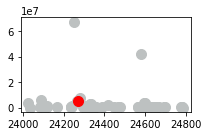

In [92]:

df_sample = df_phe
ms = 24268.30 #24267.31 #
mask = np.abs(df_sample.Mass - ms) < 0.1
specific_dot = df_sample[mask]

df_25k = df_phe[(df_phe.Mass>24000)&(df_phe.Mass<24800)]
# plot_zone(df_25k, y='Vol')
fig = plt.figure(figsize=(3, 2))
plt.scatter(df_25k.Mass, df_25k.Vol, s=100, color='#bdc1c1')
plt.scatter(specific_dot.Mass, specific_dot.Vol, s=100, color='r')
output(plt, fig, 'vol')

In [3]:
masses = [24252.31, 24581.38]

full_mass 24252.31 sum_value 24270.3


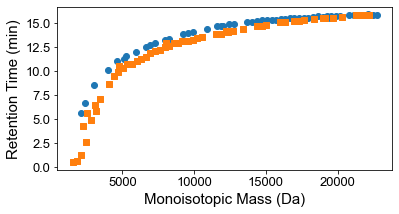

In [23]:
full_mass = masses[0]
df_cc = computational_data_seperation(df_5p, df_3p, full_mass, ignore_endpoints=True)
plt, fig = plot_zones(*df_cc)
# output(plt, fig, 'Skeleton_75nt5p')

In [29]:
fullmass_dot = df_5p[(df_5p.Mass>full_mass-0.1) & (df_3p.Mass<full_mass+0.1)]
df_gap_phe75 = find_gap_dots(df_5p, df_cc[0], fullmass_dot, orientation=5)
df_gap_phe75_3p = find_gap_dots(df_3p, df_cc[1], fullmass_dot, orientation=3)

/Users/bryan/Virtuals/vir_nb/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Processing forward 2073.23884927865
components 2073.23884927865-97.9769
keep this dot 2073.23884927865
297.9769 1873.23884927865 0.14332757616167108 5.481357334342354
Processing the gap 97.9769-2073.23884927865, 156 dots
reserved masses:  [748.065967794676, 1093.11222498153, 1438.16045218106, 1767.2130355644]
extend dots       Unnamed: 0         Mass        RT          Vol
23          181   748.065968  0.719845   1227461.17
67          493  1093.112225  1.067582   2309549.37
184         736  1438.160452  2.401147  10399553.28
314         975  1767.213036  4.427624  13158287.38
Processing forward 2238.24226960402
Processing forward 2379.26314357563
Processing forward 2544.27838623379
Processing forward 3014.34251378776
components 3014.34251378776-2073.23884927865
keep this dot 3014.34251378776
2273.23884927865 2814.34251378776 5.777833843221537 8.370938486999002
Processing the gap 2073.23884927865-3014.34251378776, 121 dots
reserved masses:  [2379.26314357563, 2685.2880999075]
extend do

extend dots        Unnamed: 0          Mass         RT         Vol
3528        5719  19249.587483  15.669279  1110536.35
Processing forward 19859.681503751
Processing forward 20188.7292600015
components 20188.7292600015-19554.6355833974
keep this dot 20188.7292600015
19754.6355833974 19988.7292600015 15.47444058508859 15.929573111359401
Processing the gap 19554.6355833974-20188.7292600015, 3 dots
extend dots        Unnamed: 0          Mass         RT         Vol
3546        5737  19859.681504  15.699472  1646582.99
Processing forward 20822.8342624128
components 20822.8342624128-20188.7292600015
keep this dot 20822.8342624128
20388.7292600015 20622.8342624128 15.540300360289445 15.999756211210062
Processing the gap 20188.7292600015-20822.8342624128, 5 dots
extend dots        Unnamed: 0          Mass         RT         Vol
3572        5763  20493.787077  15.770094  1333593.83
Processing forward 21150.8792409211
Processing forward 21167.8778289678
Processing forward 21496.9164937196
compo

reserved masses:  [11855.6618978988, 12161.6758006021]
extend dots        Unnamed: 0          Mass         RT         Vol
1787        5284  11855.661898  13.987063  1301876.74
1802        5333  12161.675801  14.017933  2711618.64
Processing forward 12702.7353262433
Processing forward 13390.8533476668
components 13390.8533476668-12373.6851470325
keep this dot 13390.8533476668
12573.6851470325 13190.8533476668 13.875798859149075 14.58698499519242
Processing the gap 12373.6851470325-13390.8533476668, 4 dots
reserved masses:  [13031.8104661525, 12702.7353262433]
extend dots        Unnamed: 0          Mass         RT         Vol
1827        5394  12702.735326  14.197013  1795739.39
1831        5416  13031.810466  14.336229   443991.59
Processing forward 14344.9861966871
components 14344.9861966871-13390.8533476668
keep this dot 14344.9861966871
13590.8533476668 14144.9861966871 14.21891966690469 14.874649847385818
Processing the gap 13390.8533476668-14344.9861966871, 3 dots
extend dots     

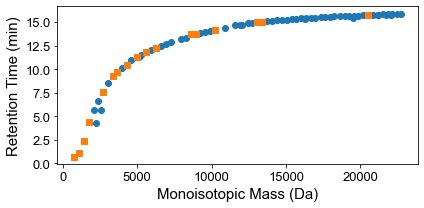

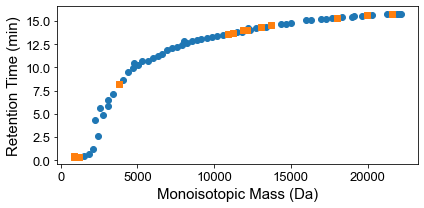

In [31]:
plt, fig = plot_zones(df_cc[0], df_gap_phe75)
output(plt, fig, 'GapFill_75nt5p')
plt, fig = plot_zones(df_cc[1], df_gap_phe75_3p)
output(plt, fig, 'GapFill_75nt3p')

In [50]:
df_phe.shape

(5933, 3)

mass_x (71,) mass_y (71,)
mass_x (54,) mass_y (54,)


/Users/bryan/Virtuals/vir_nb2/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
/Users/bryan/Virtuals/vir_nb2/lib/python3.7/site-packages/ipykernel_launcher.py:42: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


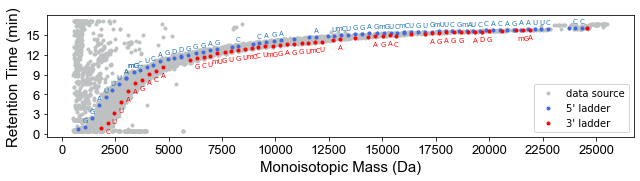

In [26]:
# major
# df_phe_3p = pd.read_csv('/Users/bryan/Studio/tools/tRNA-Phe_3p.csv')
# df_phe_5p = pd.read_csv('/Users/bryan/Studio/tools/tRNA-Phe_5p_nogap.csv')
df_phe_3p_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cca.xlsx')
df_phe_3p_2 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cc.xlsx')
df_phe_5p_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p_cca.xlsx')
df_phe_5p_2 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p.xlsx')
fig = plt.figure(figsize=(9, 2.5))
# dpi = 300
# fig = plt.figure(figsize=(356/dpi, 106/dpi), dpi=dpi)
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
plt.yticks(range(0, 17, 3), fontname="Arial", size=13, color='black')
# plt.rc('xtick', labelsize=13) 
# plt.rc('ytick', labelsize=13)
# plt.rc('axes', titlesize=15)
# plt.rc('axes', labelsize=18)
# plt.scatter(df_phe.Mass, df_phe.RT, color='navy')

# draw skeleton only
# df_phe_5p_1 = df_phe_5p_1[df_phe_5p_1.isSkeleton==True]
# df_phe_3p_1 = df_phe_3p_1[df_phe_3p_1.isSkeleton==True]

df5p = df_phe_5p_1.copy()
df3p = df_phe_3p_1.copy()
marker = '.'
plt.scatter(df_phe[df_phe.Mass<26000].Mass, df_phe[df_phe.Mass<26000].RT, color='#bdc1c1', marker=marker, label="data source")
plt.scatter(df5p.Mass, df5p.RT, color='royalblue', marker=marker, label="5' ladder")
# plt.scatter(df_phe_5p_2.Mass, df_phe_5p_2.RT, color='red', marker='1', label="5' CC")
plt.scatter(df3p.Mass, df3p.RT, color='red', marker=marker, label="3' ladder")
# plt.scatter(df_phe_3p_2.Mass, df_phe_3p_2.RT, color='red', marker='.', label="3' CC")

for idx, df_sample in enumerate([df5p, df3p]):
    color = 'r' if idx == 1 else 'C0'
    yaxis = -10 if idx == 1 else 5
    bcr = base_calling_random(df_sample)
    for t in bcr[1]:
        df_pair = df_sample[df_sample.Mass.isin(t[:2])]
        idmax = df_pair.Mass.idxmax()
        plt.annotate(s=t[2], size=7, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
                     textcoords="offset points", xytext=(0, yaxis), color=color, ha='center')

plt.legend()

# ax2.set_xticks()
# ax2.cla()
# plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')
# plt.scatter(df_phe_big.iloc[1].Mass, df_phe_big.iloc[1].RT, color='royalblue')
fig.tight_layout()
plt.savefig('/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig3/tRNA_phe_ladders_apr17.svg', transparent=True, dpi=300)

In [24]:
df_phe_3p_1

,Unnamed: 0,Mass,RT,Vol,isSkeleton,Unnamed: 0.1
0,0,1856.320000,0.857067,7636829.00,True,NaN
1,1,2161.361462,1.628741,6766369.57,True,NaN
2,3,2467.386315,3.171678,7400393.05,True,NaN
3,6,2773.411780,4.884496,14860556.88,True,NaN
4,8,3102.464036,6.456477,12957663.93,True,NaN
5,10,3431.516332,7.684908,4938928.61,True,NaN
6,12,3776.565253,8.173388,13698683.79,True,NaN
7,14,4105.616329,9.084935,4910871.83,True,NaN
8,15,4410.658306,9.503759,13102483.85,True,NaN
9,17,4739.708864,10.169118,6493068.49,True,NaN


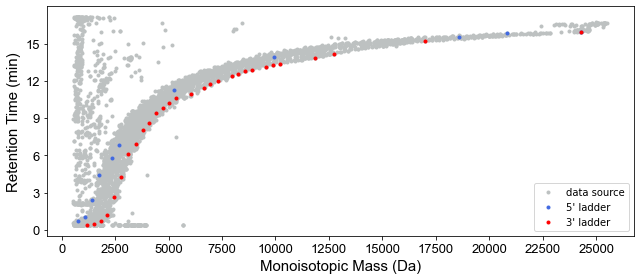

In [6]:
# minor
df_phe_3p = pd.read_excel('/Users/bryan/Studio/tools/phe2_75_3p.xlsx')
df_phe_5p = pd.read_excel('/Users/bryan/Studio/tools/phe2_75_5p.xlsx')
fig = plt.figure(figsize=(9, 4))
# dpi = 300
plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
plt.yticks(range(0, 17, 3), fontname="Arial", size=13, color='black')

df_match_3p = match_dfs(df_phe_3p, df_phe)
# df_tmp = df_phe_5p.copy()
# df_tmp.Mass += 1
df_match_5p = match_dfs(df_phe_5p, df_phe)
marker = '.'
plt.scatter(df_phe[df_phe.Mass<26000].Mass, df_phe[df_phe.Mass<26000].RT, color='#bdc1c1', marker=marker, label="data source")
plt.scatter(df_match_5p.Mass, df_match_5p.RT, color='royalblue', marker=marker, label="5' ladder")
plt.scatter(df_match_3p.Mass, df_match_3p.RT, color='red', marker=marker, label="3' ladder")
plt.legend()

# ax2.set_xticks()
# ax2.cla()
# plt.scatter(df_skeleton.Mass, df_skeleton.RT, color='royalblue')
# plt.scatter(df_phe_big.iloc[1].Mass, df_phe_big.iloc[1].RT, color='royalblue')
fig.tight_layout()
# plt.savefig('/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig3/tRNA_phe2_ladders_apr17.svg', transparent=True, dpi=300)

In [103]:
def draw_fig(df_5p, df_3p):
    fig = plt.figure(figsize=(9, 4))
    ax = plt.subplot()
    plt.xlabel('Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    # plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
    # plt.xticks(range(0, int(df_merge.Mass.max()), 320), fontname="Arial", size=13, color='black')
    mass_max = int(df_merge.Mass.max()) + 1
    major_loc = ticker.FixedLocator(range(0, mass_max, 2500))
    minor_loc = ticker.FixedLocator(range(0, mass_max, 320))
    ax.xaxis.set_major_locator(major_loc)
    ax.xaxis.set_minor_locator(minor_loc)
    ax.tick_params(which='major', colors='black')
    ax.tick_params(which='minor', colors='black')
    plt.yticks(range(0, 17, 2), fontname="Arial", size=13, color='black')
    # plt.grid(True, which='minor', axis='y')
    # plt.scatter(df_merge.Mass, df_merge.RT, color='royalblue')
    plt.scatter(df_3p.Mass, df_3p.RT, color='royalblue', marker='s')
    plt.scatter(df_5p.Mass, df_5p.RT, color='red')
    # plt.xlim(320, 25000)
    plt.grid(True, axis='x', linestyle='--', which='minor')
    return plt, fig

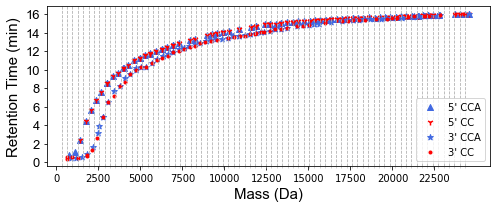

In [33]:
import matplotlib.ticker as ticker
df_phe_3p_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cca.xlsx')
df_phe_3p_2 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_3p_cc.xlsx')
df_phe_5p_1 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p_cca.xlsx')
df_phe_5p_2 = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Outputs_phe/complementary_5p.xlsx')
fig = plt.figure(figsize=(7, 3))
ax = plt.subplot()
plt.xlabel('Mass (Da)', fontname="Arial", fontsize=15, color='black')
plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
# plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
# plt.xticks(range(0, int(df_merge.Mass.max()), 320), fontname="Arial", size=13, color='black')
mass_max = int(df_phe_5p_1.Mass.max()) + 1
major_loc = ticker.FixedLocator(range(0, mass_max, 2500))
minor_loc = ticker.FixedLocator(range(0, mass_max, 320))
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_minor_locator(minor_loc)
ax.tick_params(which='major', colors='black')
ax.tick_params(which='minor', colors='#B7B7B8')
plt.yticks(range(0, 17, 2), fontname="Arial", size=13, color='black')
# plt.grid(True, which='minor', axis='y')
# plt.scatter(df_phe_3p.Mass, df_phe_3p.RT, color='royalblue', marker='s')
# plt.scatter(df_phe_5p.Mass, df_phe_5p.RT, color='red')

plt.scatter(df_phe_5p_1.Mass, df_phe_5p_1.RT, color='royalblue', marker='^', label="5' CCA")
plt.scatter(df_phe_5p_2.Mass, df_phe_5p_2.RT, color='red', marker='1', label="5' CC")
plt.scatter(df_phe_3p_1.Mass, df_phe_3p_1.RT, color='royalblue', marker='*', label="3' CCA")
plt.scatter(df_phe_3p_2.Mass, df_phe_3p_2.RT, color='red', marker='.', label="3' CC")
plt.legend()

# plt.xlim(320, 25000)
plt.grid(True, axis='x', linestyle='--', which='minor')

fig.tight_layout()
plt.savefig('/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig3/tRNA_phe_positions.svg', transparent=True, dpi=300)

In [97]:
df_phe_3p

,Unnamed: 0,Mass,RT,Vol
0,555,1206.234282,0.440768,932694.11
1,763,1511.274003,0.545651,3143896.68
2,1038,1856.320489,0.857067,7636829.42
3,1322,2161.361462,1.628741,6766369.57
4,1671,2467.386315,3.171678,7400393.05
...,...,...,...,...
56,5783,21585.084318,15.805322,581348.45
57,5787,21914.086381,15.840306,251138.12
58,5798,22526.179388,15.840306,31520.29
59,5803,22832.193268,15.870328,155029.72


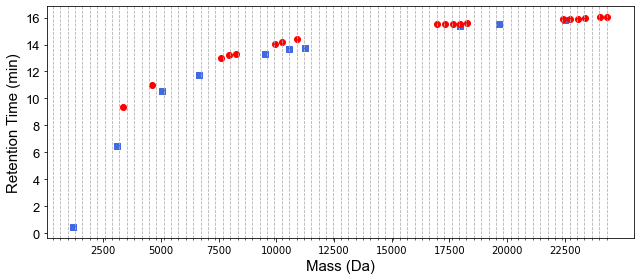

In [104]:
df_phe_5p = df_phe_5p.sort_values('Mass')
df_phe_3p = df_phe_3p.sort_values('Mass')
df_tyr_fake_5p = df_phe_5p.iloc[[9, 13, 22, 23, 24, 29, 30, 31, 49, 50, 51, 52, 53, 66, 67, 68, 69, 71, 72]]
df_tyr_fake_3p = df_phe_3p.sample(10) #[10, 11, 18, 23, 30, 46, 47, 48, 66]
plt, fig = draw_fig(df_tyr_fake_5p, df_tyr_fake_3p)
fig.tight_layout()
plt.savefig('/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig3/tRNA_tyr_positions.svg', transparent=True, dpi=300)

mass_x (5,) mass_y (5,)
[(24581.380920434, 24252.3110919712, 'A'), (25334.5687566135, 25005.5183393632, 'A'), (24280.3055005283, 24252.3110919712, '2Methyl')]


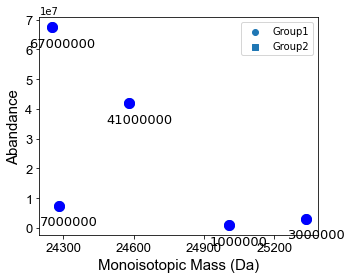

In [38]:
# Fig  Reletive Abance
df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/Draw/Source/Fig3_homology_acid_deg.xlsx')

# df = pd.read_excel('/Users/bryan/Documents/BioPharmaFinder/ZhangLab/Data/Excels/tRNA_Phe_0724.xlsx')
# df = thermo_df(df)
# df_25k = df[(df.Mass > 2.3E4) & (df.Mass < 3E4) & (df.Vol > 1E6)] 
# plotly_zone(df, y='Vol')
bcr = base_calling_random(df, homology=True)
print(bcr[1])
# fig = plt.figure(figsize=(9, 4))
plt, fig = plot_basecalling2(df, bcr[1], y='Vol', annotate=True)
plt.scatter(df.Mass, df.Vol, marker='o', s=100, color='C0')
plt.scatter(df.Mass, df.Vol, marker='o', s=100, color='b')
# plt.scatter(24200, 20000, color='white')
# plt.scatter(25200, 20000, marker='o', s=100, color='white')
plt.legend()
output(plt, fig, 'Abandance')

In [37]:
def plot_basecalling2(df, mass_pairs, endpoints=pd.DataFrame(), annotate=True, plt=None, y='RT'):
#     if in_plt:
#         plt = in_plt
#     else:
    if not plt:
        plt = matplotlib.pyplot
    fig = plt.figure(figsize=(5, 4))
#     fig.patch.set_facecolor('white')
#     plt.xlabel('Mass (Da)')
#     plt.ylabel('Retention Time (min)')
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Abandance', fontname="Arial", fontsize=15, color='black')
#     plt.xticks(range(0, 25001, 2500), fontname="Arial", size=13, color='black')
#     plt.yticks(range(0, 25, 2), fontname="Arial", size=13, color='black')
    plt.xticks(range(24000, 26001, 300), fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    
    markers = ['o', 's', 'p', 'h']
    df_group1 = df[df.Group==1]
    df_group2 = df[df.Group==2]
    plt.scatter(df_group1.Mass, df_group1[y], marker='o', color='C0', label='Group1')
    plt.scatter(df_group2.Mass, df_group2[y], marker='s', color='C0', label='Group2')
    for idx, row in df.iterrows():
        x_pos = row.Mass
        y_pos = row[y]
        mass = '{:.2f}'.format(x_pos)
        vol = '{}'.format(int(row.Vol/1000000)*1000000)
        
#         plt.scatter(x_pos, y_pos, marker=markers[int(row.Group)])
#         plt.scatter(x_pos, y_pos)
        if annotate:
            plt.annotate(text=vol, size=13, xy=(x_pos, y_pos), 
                         textcoords="offset points", xytext=(10, -20), ha='center')

    for t in mass_pairs:
        df_pair = df[df.Mass.isin(t)]
        if df_pair.empty:
            continue
#         plt.plot(df_pair.Mass, df_pair[y], 'green')
        
        idmax = df_pair.Mass.idxmax()
        x_pos = df_pair.Mass.mean()
        y_pos = df_pair[y].mean()
#         plt.annotate(text=t[2], size=15, xy=(x_pos, y_pos), 
#                      textcoords="offset points", xytext=(-10, -10), ha='center', color='C0')
        
        if not annotate:
            continue
            
#         mass = '{:.2f}'.format(df_pair.loc[idmax].Mass)
#         plt.annotate(s=mass, size=13, xy=(df_pair.loc[idmax].Mass, df_pair.loc[idmax].RT), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         print(mass_pairs, df_pair)
#         mass = '{:.2f}'.format(df_pair.iloc[0].Mass)
#         plt.annotate(text=mass, size=13, xy=(df_pair.iloc[0].Mass, df_pair.iloc[0][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')
#         mass = '{:.2f}'.format(df_pair.iloc[1].Mass)
#         plt.annotate(text=mass, size=13, xy=(df_pair.iloc[1].Mass, df_pair.iloc[1][y]), 
#                      textcoords="offset points", xytext=(10, -20), ha='center')

    if not endpoints.empty:
        plt.scatter(endpoints.Mass, endpoints.RT, color='r')
        print(endpoints[['Mass', 'RT', 'Vol']])
#     plt.show()
    return plt, fig

In [68]:
def plot_zones(df5p, df3p, trend=False, y='RT'):
    fig = plt.figure(figsize=(6, 3))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df3p.Mass, df3p[y])
        sns.regplot(df5p.Mass, df5p[y], order=2)
    else:
        plt.scatter(df5p.Mass, df5p[y], marker='o')
        plt.scatter(df3p.Mass, df3p[y], marker='s')
    
    return plt, fig

def plot_zone(df, trend=False, order=1, y='RT'):
#     import matplotlib.pyplot as plt
    fig = plt.figure(figsize=(16, 12))
    plt.xlabel('Monoisotopic Mass (Da)', fontname="Arial", fontsize=15, color='black')
    plt.ylabel('Retention Time (min)', fontname="Arial", fontsize=15, color='black')
    plt.xticks(fontname="Arial", size=13, color='black')
    plt.yticks(fontname="Arial", size=13, color='black')
    if trend:
        sns.regplot(df.Mass, df[y], order=order)
    else:
        plt.scatter(df.Mass, df[y])
    
    return plt, fig

In [84]:
def output(plt, fig, svg_name, transparent=True):
    fig.tight_layout()
    plt.savefig(f'/Users/bryan/Documents/BioPharmaFinder/Draw/Outputs_Fig3/{svg_name}.svg', dpi=300, transparent=transparent)

